사이킷런으로 수행하는 타이타닉 생존자 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
data=pd.read_csv('titanic.csv')

In [10]:
print('\n ###학습 데이터 정보### \n')
print(data.info())


 ###학습 데이터 정보### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#null 값 대체

data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Cabin'].fillna('N',inplace=True)
data['Embarked'].fillna('N',inplace=True)

print('null값 개수 \n')
print(data.isnull().sum())

null값 개수 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [14]:
#문자열 피쳐 분포 확인

print('Sex 값 분포:\n',data['Sex'].value_counts())
print('\n Cabin 값 분포:\n',data['Cabin'].value_counts())
print('\n Embarked 값 분포:\n',data['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
D                3
              ... 
E68              1
D50              1
A6               1
B80              1
T                1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [15]:
#Cabin 맨 앞자리만 추출

data['Cabin']=data['Cabin'].str[:1]
print(data['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [19]:
#성별에 따른 생존자 수 비교

data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

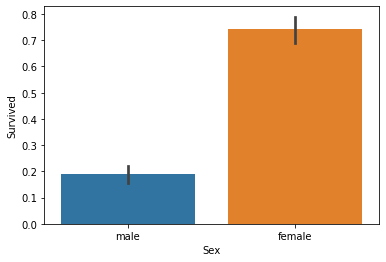

In [22]:
sns.barplot(x='Sex',y='Survived',data=data);

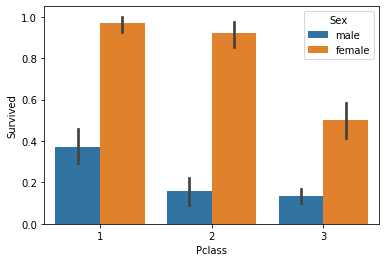

In [24]:
#재력에 따른 생존 수 비교

sns.barplot(x='Pclass',y='Survived',hue='Sex',data=data);

In [25]:
#나이에 따른 생존 수 비교

def get_category(age):
    cat=''
    if age <= -1:
        cat ='Unknown'
    elif age <= 5:
        cat='Baby'
    elif age <=12:
        cat='Child'
    elif age <=18:
        cat='Teenager'
    elif age <=25:
        cat='Student'
    elif age <=35:
        cat='Young Adult'
    elif age <=60:
        cat='Adult'
    else:
        cat='Elderly'
    
    return cat

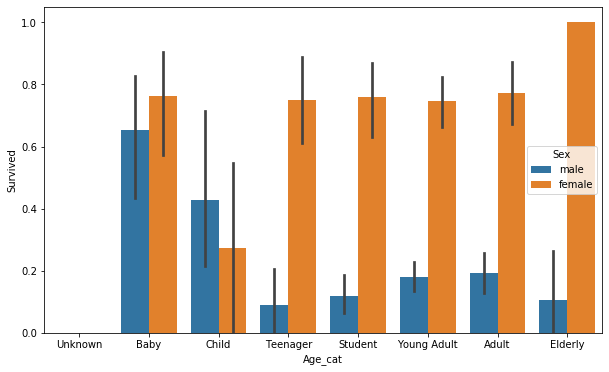

In [28]:
plt.figure(figsize=(10,6))

group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

data['Age_cat'] = data['Age'].apply(lambda x :get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=data,order=group_names);
data.drop('Age_cat',axis=1,inplace=True)

문자열 카테고리 인코딩

In [29]:
from sklearn import preprocessing

In [32]:
def encode(data):
    features=['Cabin','Sex','Embarked']
    for i in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(data[i])
        data[i]=le.transform(data[i])
    return data

data=encode(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


앞선 전처리 과정 함수화로 간편하게 하기

In [42]:
def fillna(data):
    data['Age'].fillna(data['Age'].mean(),inplace=True)
    data['Cabin'].fillna('N',inplace=True)
    data['Embarked'].fillna('N',inplace=True)
    data['Fare'].fillna(0,inplace=True)
    
    return data

def drop(data):
    data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return data

def format_feature(data):
    data['Cabin']=data['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for i in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(data[i])
        data[i]=le.transform(data[i])
    return data

#함수들 호출해 전처리 수행

def transform(data):
    data=fillna(data)
    data=drop(data)
    data=format_feature(data)
    return data

In [62]:
data=pd.read_csv('titanic.csv')

In [63]:
data_y=data['Survived']
data_x=data.drop('Survived',axis=1)

data_x=transform(data_x)

In [64]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [65]:
#train, test 셋으로 나누기

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=11)

ML 알고리즘으로 생존자 예측해보기

In [68]:
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#의사결정나무,랜덤포레스트,로지스틱 회귀

dt=DecisionTreeClassifier(random_state=11)
rf=RandomForestClassifier(random_state=11)
lr=LogisticRegression()

#의사결정나무 평가
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print('accuracy_dt:',round(accuracy_score(y_test,dt_pred),4))

#랜덤포레스트 평가
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print('accuracy_rf:',round(accuracy_score(y_test,rf_pred),4))

#로지스틱 회귀 평가
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print('accuracy_lr:',round(accuracy_score(y_test,lr_pred),4))

accuracy_dt: 0.7877
accuracy_rf: 0.8324
accuracy_lr: 0.8659


교차 검증으로 의사결정나무 더 평가해보기

In [69]:
from sklearn.model_selection import KFold

In [81]:
def kfold(clf,folds=5):
    kfold=KFold(n_splits=folds)
    score=[]
    
    #교차검증 수행
    for iter_count,(train_index,test_index) in enumerate(kfold.split(data_x)):
        X_train,X_test=data_x.values[train_index],data_x.values[test_index]
        y_train,y_test=data_y.values[train_index],data_y.values[test_index]
        
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        accuracy=accuracy_score(y_test,predict)
        score.append(accuracy)
        print(f'교차검증 {iter_count} 정확도 :{round(accuracy,4)}')
        
    #5개 폴드에서 평균 정확도 계산
    mean_score=np.mean(score)
    print(f'평균 정확도: {round(mean_score,4)}')
        
kfold(dt,folds=5)

교차검증 0 정확도 :0.7542
교차검증 1 정확도 :0.7809
교차검증 2 정확도 :0.7865
교차검증 3 정확도 :0.7697
교차검증 4 정확도 :0.8202
평균 정확도: 0.7823


In [80]:
#cross_val_score로 교차검증

from sklearn.model_selection import cross_val_score

score=cross_val_score(dt,data_x,data_y,cv=5)
for iter_count,accuracy in enumerate(score):
    print(f'교차검증{iter_count} 정확도: {round(accuracy,4)}')
    
print(f'평균 정확도: {round(np.mean(score),4)}')

교차검증0 정확도: 0.743
교차검증1 정확도: 0.7765
교차검증2 정확도: 0.7809
교차검증3 정확도: 0.7753
교차검증4 정확도: 0.8418
평균 정확도: 0.7835


In [83]:
#gridsearchcv 로 교차검증 

from sklearn.model_selection import GridSearchCV

parameter={'max_depth':[2,3,4,10],
          'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dt=GridSearchCV(dt,param_grid=parameter,scoring='accuracy',cv=5)
grid_dt.fit(X_train,y_train)

print(f'grid 최적 하이퍼 파라미터: {grid_dt.best_params_}')
print(f'grid 최고 정확도: {grid_dt.best_score_}')
best_dt=grid_dt.best_estimator_

#grid 최적 하이퍼 파라미터로 예측 및 평가
predict=best_dt.predict(X_test)
accuracy=accuracy_score(y_test,predict)
print(f'테스트 셋에서 grid 정확도: {round(accuracy,4)}')



grid 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
grid 최고 정확도: 0.7991573033707865
테스트 셋에서 grid 정확도: 0.8715


변경 전보다 약 8% 이상이 증가했는데 일반적으로는 튜닝해도 이 정도로 올라가진 않음.

테스트 셋이 작기 때문에 많이 증가한것으로 보인다.